# CatBoost: Concept and Mathematical Implementation

## Concept

CatBoost is an advanced gradient boosting algorithm that excels in handling categorical features. It builds a series of decision trees, each correcting the errors of its predecessors. The name "CatBoost" comes from "Categorical Boosting," highlighting its proficiency with categorical data.

## Key Features

• Ordered Boosting:
  - Builds trees sequentially, each focusing on correcting mistakes of previous trees
  - Processes data points in a special order, reducing bias in learning
  - Allows the model to learn complex patterns gradually

• Ensemble Approach:
  - Combines many trees to make a final decision
  - Leads to more accurate and stable predictions

• Controlled Randomness:
  - Introduces randomness in feature selection and tree building
  - Results in a more robust model that performs well on new, unseen data

• Efficient Categorical Feature Handling:
  - Uses "ordered target statistics" to handle categories efficiently
  - Automatically combines different categories to capture complex relationships
  - Allows deep understanding of categorical data without manual preprocessing

• Symmetric Trees:
  - Uses the same tree structure for all examples at a given iteration
  - Reduces overfitting and improves model generalization

### Comparison with Decision Trees, Random Forests, and Traditional Gradient Boosting

1. Better with categories: Ordered target statistics extract more information without manual encoding

2. Reduces overfitting: Ordered boosting and symmetric trees prevent over-focus on training data

3. Often more accurate: Unique category handling + boosting approach = higher accuracy

4. Versatile performance: Efficient algorithms work well on various dataset sizes

5. Interpretable: Built-in features for easy model interpretation and decision understanding

## Mathematical Implementation

### 1. Initialization:
   $$F_0(x) = \arg\min_\gamma \sum_{i=1}^n L(y_i, \gamma)$$

   - $F_0(x)$: Initial prediction function
   - $\arg\min_\gamma$: Finds the value of $\gamma$ that minimizes the following sum
   - $\sum_{i=1}^n$: Sum over all training samples (from 1 to n)
   - $L(y_i, \gamma)$: Loss function comparing true value $y_i$ to a constant prediction $\gamma$

   - Finds the best constant prediction to start with, usually the mean of target values for regression or log-odds for classification.
   - Serves as the starting point for the iterative process.

### 2. Gradient Calculation:
   $$g_i = -\left[\frac{\partial L(y_i, s)}{\partial s}\right]_{s = F_{m-1}(x_i)}$$

   - $g_i$: Gradient for the i-th sample
   - $\frac{\partial L(y_i, s)}{\partial s}$: Partial derivative of loss with respect to prediction
   - $s = F_{m-1}(x_i)$: Evaluated at the current model's prediction

   - Calculates how much we need to change our prediction to reduce the loss.
   - Guides the direction of improvement for the next tree.

### 3. Ordered Boosting:
   $$\tilde{g}_i = -\left[\frac{\partial L(y_i, s)}{\partial s}\right]_{s = F_{m-1}^{i-1}(x_i)}$$

   - $\tilde{g}_i$: Ordered gradient for the i-th sample
   - $F_{m-1}^{i-1}(x_i)$: Model trained on first i-1 samples in a random permutation

   - Reduces prediction shift by using different model states for different samples.
   - Helps prevent overfitting.

### 4. Categorical Feature Handling:
   $$\text{OrderedTS}_i = \frac{\sum_{j=1}^{i-1} [x_j = x_i] \cdot y_j + a \cdot P}{\sum_{j=1}^{i-1} [x_j = x_i] + a}$$

   - $\sum_{j=1}^{i-1} [x_j = x_i]$: Count of previous samples with same category
   - $\sum_{j=1}^{i-1} [x_j = x_i] \cdot y_j$: Sum of target values for those samples
   - $a$: Smoothing parameter
   - $P$: Prior (often overall mean of target)

   - Encodes categorical features based on their target statistics.
   - Allows efficient processing of categorical data without manual encoding.

### 5. Tree Building (Gain calculation):
   $$\text{Gain} = \sum_{j \in \{L, R\}} \frac{(\sum_{i \in j} \tilde{g}_i)^2}{\sum_{i \in j} |\tilde{g}_i|(1-|\tilde{g}_i|)} - \frac{(\sum_{i \in \text{parent}} \tilde{g}_i)^2}{\sum_{i \in \text{parent}} |\tilde{g}_i|(1-|\tilde{g}_i|)}$$

   - $\sum_{j \in \{L, R\}}$: Sum over left and right child nodes
   - $(\sum_{i \in j} \tilde{g}_i)^2$: Squared sum of gradients in a node
   - $\sum_{i \in j} |\tilde{g}_i|(1-|\tilde{g}_i|)$: Sum of gradient magnitudes times their complements
   - Last term: Same calculation for parent node

   - Measures the improvement in the model from making a split.
   - Helps in deciding the best way to grow the tree.

### 6. Leaf Value Calculation:
   $$\text{leaf\_value} = - \frac{\sum_{i \in \text{leaf}} \tilde{g}_i}{\sum_{i \in \text{leaf}} |\tilde{g}_i|(1-|\tilde{g}_i|)}$$

   - $\sum_{i \in \text{leaf}} \tilde{g}_i$: Sum of gradients in the leaf
   - $\sum_{i \in \text{leaf}} |\tilde{g}_i|(1-|\tilde{g}_i|)$: Sum of gradient magnitudes times their complements

   - Calculates the optimal prediction value for each leaf.
   - Determines the output of the tree for each data point.

### 7. Model Update:
   $$F_m(x) = F_{m-1}(x) + \alpha \cdot \text{tree}_m(x)$$

   - $F_{m-1}(x)$: Previous model
   - $\alpha$: Learning rate
   - $\text{tree}_m(x)$: Prediction of the m-th tree

   - Adds the new tree's predictions to the existing model.
   - Gradually improves the overall model's performance.

### 8. Final Prediction:
   $$\hat{y} = F_M(x) = F_0(x) + \alpha \sum_{m=1}^M \text{tree}_m(x)$$

   - $F_0(x)$: Initial prediction
   - $\sum_{m=1}^M \text{tree}_m(x)$: Sum of all tree predictions

   For classification, this is often passed through a sigmoid:
   $$p(y=1|x) = \frac{1}{1 + e^{-F_M(x)}}$$

   - Combines all trees to make the final prediction.
   - For classification, converts the raw prediction to a probability between 0 and 1.

### 9. Symmetric Trees:
   While not typically represented by a specific formula, symmetric trees can be described as:

   $$\text{split}_{level} = \arg\max_{\text{feature}, \text{threshold}} \text{Gain}(\text{feature}, \text{threshold})$$

   Where the same split is applied across an entire level of the tree.

   - Applied during the tree-building process (step 5)
   - Reduces overfitting and improves model generalization
   - Speeds up computation due to the symmetric structure

# Code

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Initial prediction: 0.37640449438202245

Iteration 1, Log Loss: 0.6622764837479065
Iteration 2, Log Loss: 0.663035500594776
Iteration 3, Log Loss: 0.6642778794836117
Iteration 4, Log Loss: 0.6685618882557525
Iteration 5, Log Loss: 0.6688305277348335
Iteration 6, Log Loss: 0.6767935838324144
Iteration 7, Log Loss: 0.6861052591172807
Iteration 8, Log Loss: 0.6861052591172807
Iteration 9, Log Loss: 0.700346012063368
Iteration 10, Log Loss: 0.7105384995196936

Final training accuracy: 0.6235955056179775


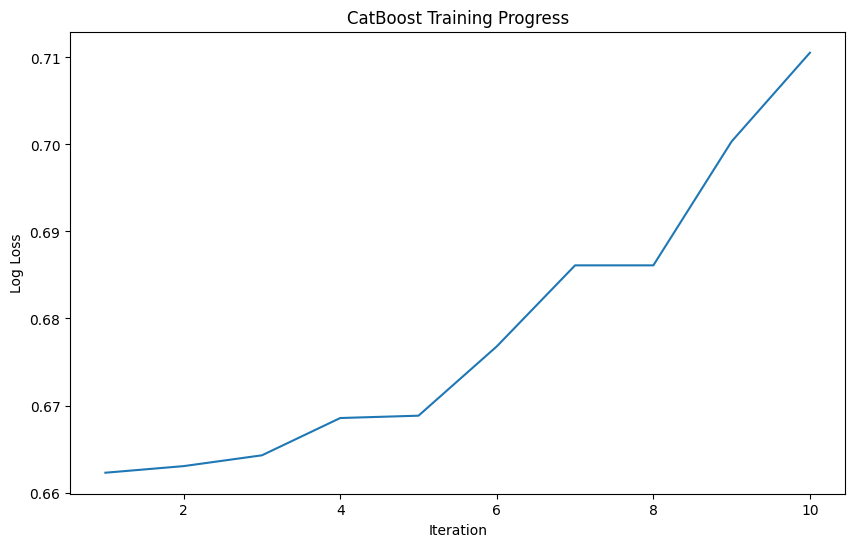

In [16]:
data = pd.read_csv('train.csv')

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def initialize(y):
    return np.mean(y)

initial_prediction = initialize(y_train)
print(f"Initial prediction: {initial_prediction}")
print()

def calculate_gradient(y, y_pred):
    return y_pred - y

def ordered_boosting(X, y, current_predictions):
    gradients = calculate_gradient(y, current_predictions)
    return gradients

def encode_categorical(X, y):
    encoded = X.copy()
    for col in X.select_dtypes(include=['object']):
        means = y.groupby(X[col]).mean()
        encoded[col] = X[col].map(means)
    return encoded

def build_tree(X, gradients, max_depth=3):
    tree = {}
    if max_depth > 0:
        best_feature = np.random.choice(X.columns)
        split_value = X[best_feature].median()
        left_mask = X[best_feature] <= split_value
        tree = {
            'feature': best_feature,
            'split': split_value,
            'left': build_tree(X[left_mask], gradients[left_mask], max_depth-1),
            'right': build_tree(X[~left_mask], gradients[~left_mask], max_depth-1)
        }
    else:
        tree['value'] = np.mean(gradients)
    return tree

def calculate_leaf_values(tree, X, gradients):
    if 'value' in tree:
        tree['value'] = np.mean(gradients)
    else:
        left_mask = X[tree['feature']] <= tree['split']
        calculate_leaf_values(tree['left'], X[left_mask], gradients[left_mask])
        calculate_leaf_values(tree['right'], X[~left_mask], gradients[~left_mask])

def update_predictions(X, tree, predictions, learning_rate):
    return predictions + learning_rate * predict_tree(X, tree)

def predict_tree(X, tree):
    if 'value' in tree:
        return np.full(len(X), tree['value'])
    else:
        left_mask = X[tree['feature']] <= tree['split']
        predictions = np.zeros(len(X))
        predictions[left_mask] = predict_tree(X[left_mask], tree['left'])
        predictions[~left_mask] = predict_tree(X[~left_mask], tree['right'])
        return predictions

n_iterations = 10
learning_rate = 0.1
predictions = np.full(len(X_train), initial_prediction)
log_loss_history = []

for i in range(n_iterations):
    gradients = ordered_boosting(X_train, y_train, predictions)
    tree = build_tree(X_train, gradients)
    calculate_leaf_values(tree, X_train, gradients)
    predictions = update_predictions(X_train, tree, predictions, learning_rate)
    
    current_log_loss = log_loss(y_train, predictions)
    log_loss_history.append(current_log_loss)
    print(f"Iteration {i+1}, Log Loss: {current_log_loss}")

final_predictions = predictions > 0.5
accuracy = np.mean(final_predictions == y_train)
print()
print(f"Final training accuracy: {accuracy}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations+1), log_loss_history)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('CatBoost Training Progress')
plt.show()